In [3]:
import cv2 as cv
import torch
import numpy as np
import pandas as pd
import torchvision
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor
import time


In [4]:
train_data = datasets.MNIST(
    root = 'data',
    train = True,
    download = True,
    transform = ToTensor()
)
test_data = datasets.MNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor()
)


In [9]:
img1 = np.zeros((600, 600, 3), np.uint8)
print(img1)
img2 = torch.from_numpy(img1)
print(img2)


[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


TypeError: expected np.ndarray (got numpy.ndarray)

In [4]:
img, label = train_data[0]
print(img)
img = img.numpy().squeeze()
print(img)

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,

In [34]:
def img_to_torch(img):
    rows, cols = 28, 28
    img = cv.resize(img, (rows, cols), interpolation = cv.INTER_LINEAR)
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    for row in range(rows):
        for col in range(cols):
            img[row, col] = (255 - img[row, col])
    img = torch.from_numpy(img).unsqueeze(0)
    img = img.type(torch.FloatTensor)/255
    img = (img - 0.5)/0.5
    img = img.permute(0, 1, 2)
    return img

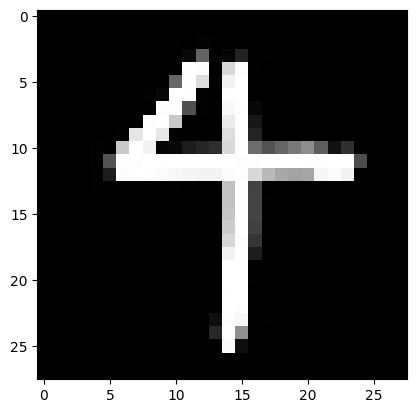

In [57]:
one = cv.imread("data/handwrite/four1.jpg")
one = img_to_torch(one)
plt.imshow(one.squeeze(), cmap = 'gray')
plt.show()

In [58]:
handwrite_list = [[]]
number = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
for i in range(0, 10):
    numb = number[i]
    for j in range(0, 11):
        img = cv.imread(f"data/handwrite/{numb}{j}.jpg")
        img = img_to_torch(img)
        handwrite_list.append([img, i])
del handwrite_list[0]

In [2]:
figure = plt.figure(figsize=(10, 10))
cols, rows = 4, 4
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(handwrite_list), size=(1,)).item()
    img, label = handwrite_list[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(label)
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

NameError: name 'handwrite_list' is not defined

<Figure size 1000x1000 with 0 Axes>